In [122]:
#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from  nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import classify
from nltk.tokenize import TweetTokenizer
from nltk import NaiveBayesClassifier
from nltk.util import ngrams
from nltk.tokenize import word_tokenize


#import regex
import re

#import BeautifulSoup
from bs4 import BeautifulSoup

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import text 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import text
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, roc_auc_score

# Word2vec
import gensim

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

# etc
import string
import pandas as pd
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
from wordcloud import WordCloud


#gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#keras
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Dropout, Input, Activation
from keras.layers.recurrent import LSTM
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Model
from keras.optimizers import RMSprop

In [98]:
Columns  = ["sentiment", "user_id", "date", "query", "username", "text"]
Date = "ISO-8859-1"

In [99]:
tweets = pd.read_csv("Data/tweets.csv", encoding = Date, names = Columns)

In [52]:
#For AWS remove row 323043 due to error
#tweets = tweets.drop(labels = [323043], axis = 0)
#tweets_new = tweets.to_csv("Data/tweets_new.csv")

In [ ]:
#Filter by sentiment and text
tweets =tweets[['sentiment', 'text', 'username']]
sentiment_mapping = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def map_sentiment(input):
    return sentiment_mapping[int(input)]
tweets['sentiment'] = tweets['sentiment'].apply(lambda x: map_sentiment(x))


In [100]:
tweets_df = tweets[['sentiment', 'text']]


In [101]:
#Map target value(y) to sentiment strings
sentiment_mapping = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def map_sentiment_map(input):
    return sentiment_mapping[int(input)]

In [102]:
#apply sentiment mapping to all of the dataset
y_samp = tweets_df['sentiment'].apply(lambda x: map_sentiment_map(x))


In [103]:
#data cleaning
punct = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct))


In [104]:
tweets['text'] = tweets_df['text'].apply(lambda text: remove_punctuation(text))

In [105]:
stemmer = PorterStemmer()
more_stop_words =  ('go', 'twitter', 'Twitter', 'TWITTER', 'Tweet', 'got', 'quot','dont', 'amp', 'nan', 'you', 'time', 'im', 'ur', 'ill', 'just', 'a', 'and', 'don\'t', 'twitter', 'tweet')
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)
stop_words = set(stop_words)
#if 'not' in stop_words:
  #  stop_words.remove('not')
def clean(text):
    #removed links and chars
    remove = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(remove, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split(): 
        if token not in stop_words:
                tokens.append(stemmer.stem(token))
    return " ".join(tokens)



In [106]:
tweets_clean = tweets.text.apply(lambda x: clean(x))

In [107]:
def cleaned(token):
    if token == 'sorri':
        return 'sorry'
    if token == 'r':
        return 'are'
    if token == 'realli':
        return 'really'
    if token == 'happi':
        return 'happy'
  
    return token

In [108]:
tweets_cleaned = tweets_clean.apply(lambda x: cleaned(x))

In [109]:
from collections import Counter
cnt = Counter()
for text in tweets_clean.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('day', 101310),
 ('good', 90568),
 ('work', 85273),
 ('like', 82962),
 ('love', 81100),
 ('today', 66105),
 ('go', 64131),
 ('thank', 57922),
 ('want', 57049),
 ('miss', 56303)]

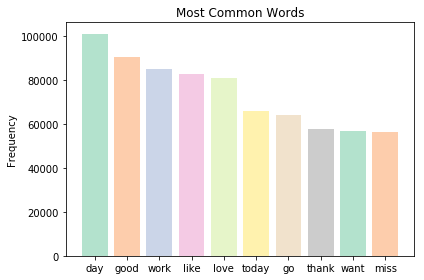

In [110]:
from matplotlib import cm
y = [count for tag, count in cnt.most_common(10)]
x = [tag for tag, count in cnt.most_common(10)]

my_cmap = plt.get_cmap("Pastel2")

plt.bar(x, y, color=my_cmap.colors)
plt.title("Most Common Words")
plt.ylabel("Frequency")
plt.savefig('Top_10_Words')
plt.tight_layout()

plt.rcParams['savefig.dpi'] = 300



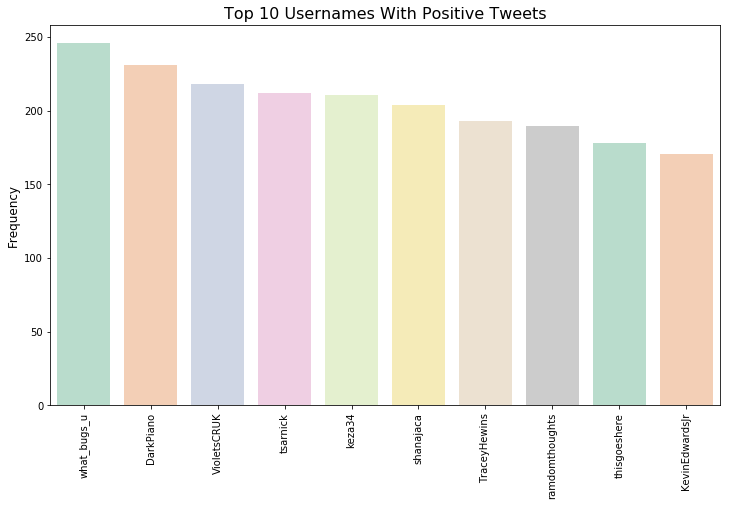

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(12,7))
common_keyword=sns.barplot(x=tweets[tweets['sentiment']=='POSITIVE']['username'].value_counts()[:10].index, \
                           y=tweets[tweets['sentiment']=='POSITIVE']['username'].value_counts()[:10],palette='Pastel2')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Frequency',fontsize=12)
plt.title('Top 10 Usernames With Positive Tweets',fontsize=16)
plt.rcParams['savefig.dpi'] = 300
plt.show()
plt.savefig('Top 10 Usernames')


In [75]:
pd.set_option('display.max_colwidth',-1)
tweets[tweets['username']=='what_bugs_u'].head()


,sentiment,text,username
1141441,POSITIVE,"@JadeMcCray why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1141626,POSITIVE,"@cadmiumcannibal why limit your story to 140 ch. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1141648,POSITIVE,"@RonanDosSantos why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1141674,POSITIVE,"@ShayMac28 why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1142667,POSITIVE,"@lynnsdecor why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u


In [169]:
tweets_concat = pd.concat([tweets_cleaned, y_samp], axis=1)

In [170]:
samp = tweets_concat.sample(n=1000,replace=False)

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color="white").generate(" ".join(samp[samp['sentiment'] == 'POSITIVE'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color="white").generate(" ".join(samp[samp['sentiment'] == 'NEGATIVE'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.85, min_df=1, max_features=5000, ngram_range=(1,3))
X = vectorizer.fit_transform(samp['text'])

In [103]:
features = vectorizer.get_feature_names()

In [43]:
len(features)

5000

In [21]:
lda = LatentDirichletAllocation(n_components=10, random_state=42, learning_method='online', n_jobs=-1)
lda.fit(X)
top_components = lda.components_.argsort()[:,-1:-11:-1]

for i, v in enumerate(top_components):
    print(i, [features[i] for i in v])

0 ['fun', 'look', 'tonight', 'didnt', 'bad', 'rain', 'awesom', 'ok', 'ugh', 'kid']
1 ['today', 'come', 'watch', 'wait', 'sleep', 'play', 'movi', 'use', 'leav', 'day']
2 ['like', 'home', 'wish', 'hour', 'look', 'make', 'littl', 'hurt', 'parti', 'good']
3 ['want', 'know', 'follow', 'feel', 'friend', 'hate', 'did', 'long', 'oh', 'let']
4 ['night', 'haha', 'say', 'tri', 'tomorrow', 'went', 'stuff', 'good', 'big', 'excit']
5 ['love', 'morn', 'miss', 'new', 'nice', 'sorri', 'tweet', 'wanna', 'good', 'lol']
6 ['wont', 'yay', 'phone', 'wow', 'run', 'favorit', 'plan', 'sweet', 'goodnight', 'studi']
7 ['work', 'day', 'school', 'final', 'year', 'help', 'hous', 'tell', 'weekend', 'readi']
8 ['need', 'week', 'great', 'twitter', 'start', 'hey', 'right', 'talk', 'live', 'man']
9 ['thank', 'day', 'good', 'realli', 'hope', 'happi', 'yeah', 'think', 'make', 'better']


In [20]:
samp_csv = tweets_concat.to_csv('/tf/Desktop/Class/Twitter-Sentiment-Analysis/samp.csv')

In [235]:
samp_c = pd.read_csv('/tf/Desktop/Class/Twitter-Sentiment-Analysis/App/samp.csv')

In [250]:
#samp_c = samp_c.dropna()


In [187]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(samp['text'])
y = samp['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)


In [188]:
multi_naive_bayes = MultinomialNB()
fitted = multi_naive_bayes.fit(X_train, y_train)
np.mean(fitted.predict(X_test) == y_test)

#76% on all dataset AWS

0.65

In [41]:
vectorizer.transform(['love'])

<1x98113 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [194]:
y_pred = multi_naive_bayes.predict_proba(X_test)
y_pred
for prob in y_pred:
    max_index = np.argmax(prob)
    probability = prob[max_index]
print(probability)

0.7834626182661445


In [234]:
def predict(text):
  
    text_ = vectorizer.transform([text])
    score = multi_naive_bayes.predict_proba(text_)
    for prob in score:
        max_index = np.argmax(prob)
        probability = prob[max_index]
        if max_index == 1:
            print('positive')
        else:
            print ('negative')
        
    return probability

In [237]:
a = predict('sad')
print(a)

negative
0.9078813556625978


positive
0.7361687462393961


In [118]:
confusion_matrix(y_test, y_pred)

array([[79, 29],
       [40, 52]])

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.64      0.68      0.66       101
    POSITIVE       0.66      0.62      0.64        99

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200



In [175]:
sentiment_mapping = {"NEGATIVE": 0,  "POSITIVE": 1}
def map_sentiment(input):
    return sentiment_mapping[str(input)]
y_test = y_test.apply(lambda x: map_sentiment(x))
#y_pred = y_pred.apply(lambda x: map_sentiment(x))

In [178]:
accuracy_score(y_test, y_pred) # TP + TN/ TP + TN + FP + FN

0.0

In [179]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_convert)

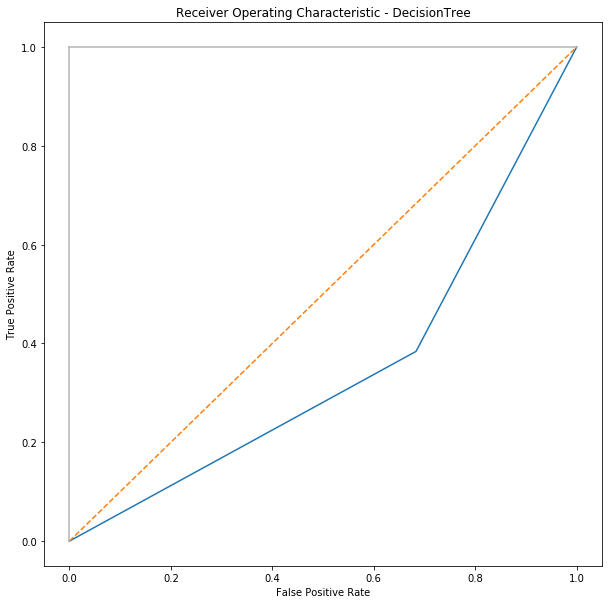

In [181]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [238]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [239]:
#based on 100k samples, .739 accuracy
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=samp['sentiment'].unique(), title="Confusion matrix")
plt.show()

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [144]:
samp_vec = tweets_concat.sample(n=10000,replace=False)


In [145]:
X_vec = samp_vec['text']
y_vec = samp_vec['sentiment']

In [146]:
vec_train, vec_test = train_test_split(samp_vec, test_size=.20, random_state=42)

In [147]:
doc = [_text.split() for _text in vec_train.text] 

In [148]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=7)

In [149]:
w2v_model.build_vocab(doc)

#SEQUENCE_LENGTH = 300
#EPOCHS = 7
#BATCH_SIZE = 1024

In [150]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 865


In [151]:
w2v_model.train(doc, total_examples=len(doc), epochs=6)

W0327 17:07:14.301647 140366841616128 base_any2vec.py:1372] under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


(167555, 326556)

In [138]:
w2v_model.most_similar("love")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('amaz', 0.9999585747718811),
 ('gonna', 0.9999549984931946),
 ('did', 0.9999526143074036),
 ('lol', 0.9999525547027588),
 ('littl', 0.9999520778656006),
 ('thing', 0.9999514818191528),
 ('your', 0.9999507665634155),
 ('fun', 0.9999503493309021),
 ('wait', 0.9999502301216125),
 ('end', 0.9999498128890991)]

In [152]:
#tokenizer creates index dictionary so every word gets a unique integer value, So lower integer means more frequent word

tokenizer = Tokenizer()
tokenizer.fit_on_texts(vec_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 14608


In [153]:
#Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces 
#it with its corresponding integer value from the word_index dictionary.
x_train_f = pad_sequences(tokenizer.texts_to_sequences(vec_train.text), maxlen=300)
x_test_f = pad_sequences(tokenizer.texts_to_sequences(vec_test.text), maxlen=300)

In [35]:
#df - all samp_vec
#df_train - all veec_train
#df_train.target - sentiment   vec_train.sentiment

In [44]:
vec_train.sentiment.unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [46]:
#labels = vec_train.sentiment.unique().tolist()
#labels.append(NEUTRAL)

In [154]:
encoder = LabelEncoder()
encoder.fit(vec_train.sentiment.tolist())

y_train_f = encoder.transform(vec_train.sentiment.tolist())
y_test_f = encoder.transform(vec_test.sentiment.tolist())

y_train_f = y_train_f.reshape(-1,1)
y_test_f = y_test_f.reshape(-1,1)


In [37]:
print("x_train_f", x_train_f.shape)
print("y_train_f", y_train_f.shape)
print("x_test_f", x_test_f.shape)
print("y_test_f", y_test_f.shape)


x_train_f (8000, 300)
y_train_f (8000, 1)
x_test_f (2000, 300)
y_test_f (2000, 1)


In [155]:
#embed layer
#create a matrix of one embedding for each word in the training dataset. We can do that by enumerating all 
#unique words in the Tokenizer.word_index and locating the embedding weight vector from the loaded W2V embedding.

#The result is a matrix of weights only for words we will see during training.
embedding_matrix = np.zeros((vocab_size, 300))
#fitted on training text data, for word in the training vocab list
for word, i in tokenizer.word_index.items():
#if word is in the w2v vocab list
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(14608, 300)


In [ ]:
#The key difference is that the embedding layer can be seeded with the GloVe word embedding weights.
#We chose the 100-dimensional version, therefore the Embedding layer must be defined with output_dim set to 300. 
#Finally, we do not want to update the learned word weights in this model, therefore we will set the 
#trainable attribute for the model to be False.

In [156]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [157]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          4382400   
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 4,542,901
Trainable params: 160,501
Non-trainable params: 4,382,400
_________________________________________________________________


In [159]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [160]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [1]:
history = model.fit(x_train_f, y_train_f,
                    batch_size=1024,
                    epochs=6,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

NameError: name 'model' is not defined

In [161]:
from keras import models
history = models.load_model('keras_model_for_rena.mdl')

In [164]:
def decode_sentiment(score, include_neutral=False):
    SENTIMENT_THRESHOLDS = (0.4, 0.7)

    if score <= SENTIMENT_THRESHOLDS[0]:
        label = NEGATIVE
    elif score >= SENTIMENT_THRESHOLDS[1]:
        label = POSITIVE

    return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

SyntaxError: invalid syntax (<ipython-input-164-be57df5be825>, line 10)

In [162]:
tokenizer = Tokenizer()

In [182]:
def predicts(text, include_neutral=False):
  
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=300)
    # Predict
    score = history.predict([x_test])[0]
    # Decode sentiment
  #  label = decode_sentiment(score)

    return {"score": float(score)}

In [184]:
predicts("love sdajklsd")

{'score': 0.5552207231521606}

In [167]:
history.history['acc']

TypeError: 'History' object is not subscriptable

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 

TypeError: 'NoneType' object is not subscriptable

In [ ]:
score = model.evaluate(x_test_f, y_test_f, batch_size=1024)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/2 [==============>...............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5205

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

TypeError: 'NoneType' object is not subscriptable